In [1]:
import pandas as pd
import numpy as np
import konlpy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk

In [2]:
dir_path = '../data/'
paths = ['P-GPT_log_EIC기술부_김세현.xlsx','P-GPT_log_에너지조선마케팅실_유태욱.csv','P-GPT_log_재무실_유태욱.csv',
         'P-GPT_log_포항에너지부_황양하.csv','P-GPT_log_포항제강설비부_황양하.csv']

In [332]:
# law = pd.read_excel(dir_path + paths[0])
law = pd.read_csv(dir_path + paths[1])

In [333]:
law.head()

,Unnamed: 0,CreatedDatetime,UserCode,Department,UserQuestion,Model,ResponseTime,Unnamed: 7
0,429,2023-03-07 6:39,79,에너지조선마케팅실,오늘 저녁 메뉴 추천해줘,gpt-3.5,8,1
1,439,2023-03-07 6:40,79,에너지조선마케팅실,포만감이 높으면서 칼로리는 낮은 한식 추천해줘,gpt-3.5,15,1
2,442,2023-03-07 6:41,79,에너지조선마케팅실,니가 추천해준 메뉴를 잘하는 식당을 알려줘 송파 경찰병원역 근처면 좋아,gpt-3.5,15,1
3,462,2023-03-07 6:47,79,에너지조선마케팅실,주소가 다 같은데 상호명만 다르게 하면 다른 식당이야? 똑바로 안해?,gpt-3.5,8,1
4,494,2023-03-07 6:54,79,에너지조선마케팅실,can you recommend best korean restaurant near ...,gpt-3.5,9,1


In [334]:
law = law[['UserCode', 'UserQuestion','Unnamed: 7']]

In [335]:
law = law.rename(columns = {'Unnamed: 7':'라벨'})

In [338]:
len(law['UserCode'].unique())

28

In [337]:
law2 = law[law['라벨']==5]

In [314]:
# law2 = law2.drop(['Unnamed: 0'], axis = 1)

In [315]:
law2.tail()

,UserCode,UserQuestion,라벨
1385,730,포스코 창립일,5.0
1386,730,엑셀 평균 함수 구하는 방법,5.0
1443,1247,엑셀에서 한글만 모두 삭제하는 방법을 알려줘,5.0
1444,1247,엑셀에서 영어가 있는 데이터를 선택하는 방법,5.0
1876,1247,A열과 B열의 값이 같은 때 C열에 O를 표기하는 엑셀 함수를 알려줘,5.0


In [316]:
law2['UserQuestion'] = law2['UserQuestion'].str.replace('[^\w가-힣]', ' ', regex = True)
law2['UserQuestion']

C:\Users\piai\AppData\Local\Temp\ipykernel_7684\2024326415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  law2['UserQuestion'] = law2['UserQuestion'].str.replace('[^\w가-힣]', ' ', regex = True)


79                    엑셀에서  특정 셀에 숫자를 알파벳으로 변경되는 방법을 알려줘 
266                                      엑셀파일 수식 한번에 적용하기
371                                엑셀파일 해당날짜의 요일을 나타내는 수식
784     Please tell me the function of writing O in an...
785     In the designated cell of Excel  please tell m...
787     If the number of A1 cells in Excel is more tha...
788     If A1 cell in Excel is X or the number of B1 c...
791     If A1 cell in Excel is X or the number of B1 c...
797     엑셀에서 A1 셀이 O이면서 B1 셀이 1 이상일 경우 C1 셀에 O를 표기하고 B...
808                              엑셀에서 항목별 갯수를 구하는 함수를 알려줘
809                           엑셀에서 항목별 중복사항을 삭제하는 기능을 알려줘
852     vlookup 함수를 이용해서 특정열에 텍스트 조건이 맞으면 해당 하는 행들의 다른...
856     직렬로 연결된 스위치 2개를 동시에 누르면 램프가 동작하는 방식의 프로그램을 STL...
868                         엑셀의 A열과 B열의 데이터를 비교하는 함수를 알려줘
869                          엑셀의 VLOOKUP 함수 사용하는 방법을 알려줘 
870     If column A data and column B data in Excel ar...
967     엑셀 B3299셀에서 B4083셀까지     3  TROLLEY설치    라는 데이...
1148    엑셀 B70

In [317]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [318]:
kkma = konlpy.tag.Kkma()

def mixed_nouns(text):
    # 한글 형태소 분석
    ko_nouns = kkma.nouns(text)
    # 영어 단어 토큰화
    en_nouns = word_tokenize(text)
    # 영어와 한글 결과 병합
    return ko_nouns + en_nouns
nonus = law2['UserQuestion'].apply(mixed_nouns)

In [319]:
df_word = pd.DataFrame({'word' : nonus})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word

,word,count
79,"[엑셀, 특정, 셀, 숫자, 알파벳, 변경, 방법, 엑셀에서, 특정, 셀에, 숫자를...",15
266,"[엑셀, 수식, 한번, 적용, 엑셀파일, 수식, 한번에, 적용하기]",8
371,"[엑셀, 엑셀파일, 파일, 해당, 해당날짜, 날짜, 요일, 수식, 엑셀파일, 해당날...",13
784,"[1, 0, Please, tell, me, the, function, of, wr...",31
785,"[1, 0, In, the, designated, cell, of, Excel, p...",29
787,"[1, 0, If, the, number, of, A1, cells, in, Exc...",33
788,"[1, 0, If, A1, cell, in, Excel, is, X, or, the...",49
791,"[1, 0, If, A1, cell, in, Excel, is, X, or, the...",49
797,"[엑셀, 1, 셀, 이면서, 이상, 경우, 표기, 0, 값, 함수, 엑셀에서, A1...",42
808,"[엑셀, 항목, 갯수, 함수, 엑셀에서, 항목별, 갯수를, 구하는, 함수를, 알려줘]",10


In [320]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\piai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [321]:
stop_words_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [322]:
file_path = '../data/stopwords.txt'

# 파일을 열고 각 줄을 리스트에 저장
with open(file_path, 'r', encoding='utf-8') as file:
    lines = [line.strip() for line in file]

# 결과 출력
print(lines)

['1', '2', '3', '4', '5', '가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수', '다시 말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장', '대로 하다', '대하면', '대하여', '대해 말하자면', '대해서', '댕그', '더구나', '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하다', '동시에', '동안', '된바에야', '된이상', '두번째로'

In [323]:
stop_word = stop_words_list + lines

In [324]:
stop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [325]:
for i in df_word['word']:
    for j in i:
        if j in stop_word:
            i.remove(j)

In [326]:
df_word

,word,count
79,"[엑셀, 특정, 셀, 숫자, 알파벳, 변경, 방법, 엑셀에서, 특정, 셀에, 숫자를...",15
266,"[엑셀, 수식, 한번, 적용, 엑셀파일, 수식, 한번에, 적용하기]",8
371,"[엑셀, 엑셀파일, 파일, 해당, 해당날짜, 날짜, 요일, 수식, 엑셀파일, 해당날...",13
784,"[0, Please, tell, the, function, writing, O, a...",31
785,"[0, In, designated, cell, Excel, please, tell,...",29
787,"[0, If, number, A1, cells, Excel, more, 1, ple...",33
788,"[0, If, A1, cell, Excel, X, the, number, B1, c...",49
791,"[0, If, A1, cell, Excel, X, the, number, B1, c...",49
797,"[엑셀, 셀, 이면서, 경우, 표기, 0, 값, 함수, 엑셀에서, A1, 셀이, O...",42
808,"[엑셀, 항목, 갯수, 함수, 엑셀에서, 항목별, 갯수를, 구하는, 함수를, 알려줘]",10


In [327]:
df_word_exploded = df_word.explode('word')
df_word_grouped = df_word_exploded.groupby('word', as_index=False).count().sort_values('count', ascending=False)


In [328]:
df_word_grouped

,word,count
133,엑셀,19
50,cell,13
0,0,11
190,함수,11
128,알려줘,11
...,...,...
90,데이터가,1
92,데이터에서,1
93,데이터의,1
94,동시,1


In [329]:
dic_word = df_word_grouped.set_index('word').to_dict()['count']
dic_word

{'엑셀': 19,
 'cell': 13,
 '0': 11,
 '함수': 11,
 '알려줘': 11,
 'the': 11,
 'A1': 8,
 '함수를': 7,
 'X': 7,
 'O': 7,
 'C1': 7,
 'B1': 7,
 '방법': 7,
 'Excel': 6,
 'function': 6,
 'number': 6,
 '엑셀에서': 6,
 '데이터': 5,
 'please': 5,
 '1': 5,
 '구하는': 5,
 'cells': 5,
 '셀에': 4,
 '셀이': 4,
 'tell': 4,
 '값': 4,
 'If': 4,
 '수식': 4,
 'more': 4,
 '특정': 3,
 '경우': 3,
 'column': 3,
 'writing': 3,
 'data': 3,
 '셀': 3,
 '해당': 3,
 '열': 3,
 '방법을': 3,
 '엑셀파일': 3,
 '데이터를': 3,
 'displays': 2,
 'it': 2,
 '삭제하는': 2,
 '삭제': 2,
 'if': 2,
 '창립일': 2,
 'let': 2,
 'know': 2,
 '엑셀의': 2,
 'write': 2,
 '열과': 2,
 '열의': 2,
 '같은': 2,
 '행의': 2,
 '스위치': 2,
 '텍스트': 2,
 '포스코': 2,
 '항목': 2,
 '표기하고': 2,
 'O를': 2,
 '항목별': 2,
 '표기': 2,
 '합': 2,
 'A열과': 2,
 'B열의': 2,
 '평균': 2,
 '합을': 2,
 '한번에': 1,
 '한번': 1,
 '영어': 1,
 '영어가': 1,
 '연결된': 1,
 '1257': 1,
 '요일': 1,
 '연결': 1,
 '엑셀함수를': 1,
 '엑셀함수': 1,
 '요일을': 1,
 '언어': 1,
 '1257과': 1,
 '언어로': 1,
 '이상일': 1,
 '알파벳으로': 1,
 '알파벳': 1,
 '1258': 1,
 '않는': 1,
 '아무': 1,
 '해당날짜': 1,
 '해당날짜의': 1,
 '행': 1,
 '행

In [330]:
  # 여기에 폰트 파일의 경로를 입력하세요.
font_path = 'C:\Windows\WinSxS\amd64_microsoft-windows-f..uetype-malgungothic_31bf3856ad364e35_10.0.19041.1_none_bb40ebfb65874170/malgun.ttf' 

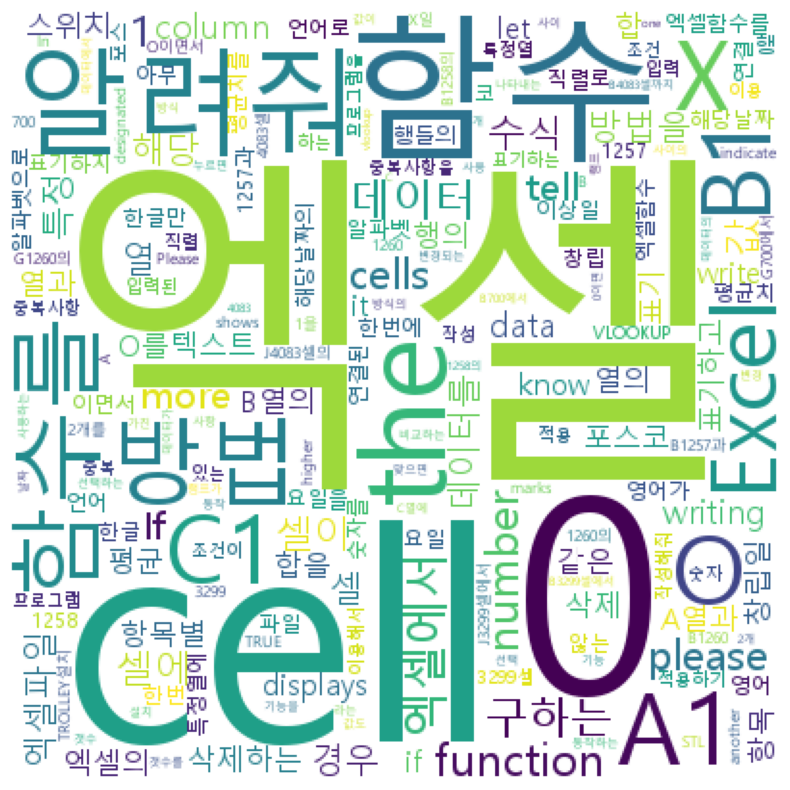

In [331]:
wc = WordCloud(random_state = 123, width = 400,
               height = 400, background_color = 'white', font_path = font_path)

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기